In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys,time
import cv2

In [2]:
path = "./data/"

In [5]:
#Checking a sample image
img = plt.imread('./data/IMG_20190327_112613.jpg')

(3024, 4032, 3)


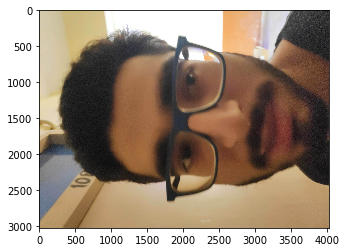

In [6]:
print(img.shape)
plt.imshow(img)

In [7]:
#Converting to grayscale
#for file in os.listdir(path):
#    image = cv2.imread(path+file)
#    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#    cv2.imwrite("./local_data_grays/"+file, gray)

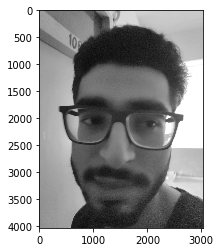

In [8]:
#Checking a sample image
img = plt.imread('./data_grays/IMG_20190327_112613.jpg')
plt.imshow(img,cmap="gray")


In [9]:
#Resizing the image
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    # return the resized image
    return gray

In [10]:
# Resizing the data
#path_new = "./data_grays/"
#for file in os.listdir(path_new):
#    image = cv2.imread(path_new+file)
#    resize = image_resize(image, height=70)
#    cv2.imwrite("./data_grays_resized/"+file, resize)

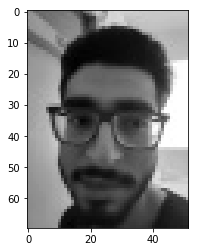

In [11]:
#Checking a sample image
img = plt.imread('./data_grays_resized/IMG_20190327_112613.jpg')
plt.imshow(img,cmap="gray")


In [12]:
print(img.shape)
l = img.shape[0]
r = img.shape[1]
print(l,r)

(70, 52)
70 52


#Creating DATA array
df = pd.DataFrame(columns=np.arange(l*r)+1)
path_new = "./local_data_grays_resized/"
i=0
categories=[]
for file in os.listdir(path_new):
    image = plt.imread(path_new+file)
    x = int(i/5)
    #print(x+1)
    categories.append(x)
    flt_image = image.flatten()
    df.loc[i] = flt_image
    i=i+1
df['category'] = np.array(categories)


In [13]:
#df.head()
#df.to_csv('data1.csv',index=False)

In [15]:
df = pd.read_csv('data1.csv')
print(df.shape)
df.head()

(45, 3641)


,1,2,3,4,5,6,7,8,9,10,...,3632,3633,3634,3635,3636,3637,3638,3639,3640,category
0,223,222,222,221,221,220,220,220,219,219,...,140,131,148,150,136,136,90,67,92,1
1,225,224,224,223,222,222,222,221,222,219,...,222,224,224,227,226,224,219,220,219,1
2,108,124,156,213,216,218,214,216,213,215,...,87,85,71,68,78,94,104,110,90,1
3,245,244,242,241,239,238,237,237,235,234,...,52,54,58,50,48,57,59,68,63,1
4,148,150,149,149,150,150,149,151,150,152,...,20,20,20,20,20,20,20,19,18,1


In [16]:
X = df.drop(['category'],axis=1)

In [17]:
adj_matrix = X-X.mean()
adj_arr = adj_matrix.values.astype(float)
cov = np.matmul(adj_arr,adj_arr.T)
print(cov.shape)
print(cov)

(45, 45)
[[ 9634560.95209877  4055234.12987654 -2149694.47012346 ...
   -854847.15901235 -2966879.73679012   234771.32987654]
 [ 4055234.12987654 14069475.30765432 -3544499.29234568 ...
  -1482563.98123457 -7115882.55901235  3404425.50765432]
 [-2149694.47012346 -3544499.29234568 10974909.10765432 ...
   1632527.41876543  3439273.84098765 -3591811.09234568]
 ...
 [ -854847.15901235 -1482563.98123457  1632527.41876543 ...
   9202522.72987654  -691393.84790123 -2377968.78123457]
 [-2966879.73679012 -7115882.55901235  3439273.84098765 ...
   -691393.84790123 16732228.57432099 -4347507.35901235]
 [  234771.32987654  3404425.50765432 -3591811.09234568 ...
  -2377968.78123457 -4347507.35901235 12802966.70765432]]


In [18]:
eig_value, eig_vec = np.linalg.eig(cov)

In [19]:
eig_vec

array([[-0.06327506,  0.10332004, -0.10518424, ..., -0.15510733,
        -0.08713018,  0.20751411],
       [-0.19355102,  0.08138599, -0.06053825, ...,  0.15514219,
         0.01101188, -0.27642638],
       [ 0.19604455, -0.01825142, -0.01956199, ...,  0.00157715,
        -0.06629764,  0.27626484],
       ...,
       [ 0.05531678,  0.14837305,  0.03013836, ..., -0.172396  ,
         0.10068094,  0.10582298],
       [ 0.26881107, -0.23789673, -0.17014032, ...,  0.25044921,
         0.14678525, -0.0582405 ],
       [-0.21798002, -0.11733159, -0.06957012, ...,  0.10499405,
         0.12802335,  0.05189615]])

In [20]:
eig_value

array([9.05494944e+07, 4.96347984e+07, 3.60718160e+07, 3.15977329e+07,
       2.19403798e+07, 1.95892376e+07, 1.76018072e+07, 1.46149676e+07,
       1.32027435e+07, 1.18555818e+07, 1.14938607e+07, 1.07678903e+07,
       9.76798978e+06, 9.17675236e+06, 5.08873052e-09, 8.16495093e+06,
       8.00707652e+06, 7.31801124e+06, 6.87613019e+06, 6.77296039e+06,
       6.12259799e+06, 5.92858236e+06, 5.72214269e+06, 5.29656266e+06,
       1.86788264e+06, 4.96768652e+06, 4.76506444e+06, 4.54300946e+06,
       4.41621574e+06, 2.09132638e+06, 2.19053912e+06, 2.30305407e+06,
       2.39909140e+06, 2.50441770e+06, 2.52786359e+06, 2.72866212e+06,
       2.80176057e+06, 2.95979424e+06, 3.09993424e+06, 3.33905613e+06,
       3.41759396e+06, 3.60037514e+06, 3.99336227e+06, 3.94716507e+06,
       3.82729705e+06])

In [21]:
eig_vec.shape

(45, 45)

In [22]:
eig_value.shape

(45,)

In [23]:
eig_face = np.matmul(eig_vec.T, adj_arr)
print(eig_face)
print(eig_face.shape)

[[-164.57101992 -166.82604256 -152.04563793 ...  -54.72904139
   -48.47544016  -60.80547832]
 [   1.08658977    1.04940555    8.36726897 ...  -24.92363435
   -30.82147055  -31.65361603]
 [  38.32277831   49.81131131   51.01799538 ...  -22.28245188
     9.79513608   15.51578828]
 ...
 [  -3.40158994   -7.34721273  -14.75679721 ...  -10.86885396
     0.51942634    9.78702962]
 [  27.81981325   31.90494008   31.13138246 ...  -24.42340399
   -35.90565331  -31.86453486]
 [  14.0947794    19.38969383   21.05749232 ...  -17.51352207
   -27.59032695  -53.65997923]]
(45, 3640)


In [24]:
sig = np.matmul(eig_face, adj_arr.T)
print(sig)
print(sig.shape)

[[-5.72952486e+06 -1.75259467e+07  1.77517348e+07 ...  5.00890679e+06
   2.43407069e+07 -1.97379804e+07]
 [ 5.12826944e+06  4.03957730e+06 -9.05905690e+05 ...  7.36446621e+06
  -1.18079564e+07 -5.82372991e+06]
 [-3.79418642e+06 -2.18372448e+06 -7.05636654e+05 ...  1.08714539e+06
  -6.13727043e+06 -2.50952067e+06]
 ...
 [-6.19399740e+05  6.19538973e+05  6.29811977e+03 ... -6.88439685e+05
   1.00013442e+06  4.19279283e+05]
 [-3.43917207e+05  4.34657117e+04 -2.61687710e+05 ...  3.97404274e+05
   5.79385619e+05  5.05329279e+05]
 [ 7.94218135e+05 -1.05796586e+06  1.05734761e+06 ...  4.05015968e+05
  -2.22903695e+05  1.98621984e+05]]
(45, 45)


# Creating the test data


In [25]:
path = "./test_data/"

In [28]:
#Checking a sample image
img = plt.imread('./test_data/005.jpg')

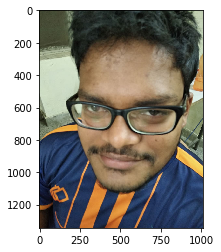

In [29]:
plt.imshow(img)

In [56]:
print(img.shape)

(1344, 1008, 3)


#Converting to grayscale
for file in os.listdir(path):
    image = cv2.imread(path+file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("./test_data_grays/"+file, gray)

(1344, 1008)


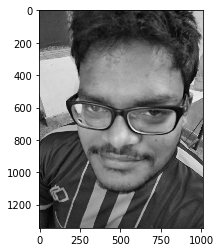

In [49]:
#Checking a sample image
img = plt.imread('./test_data_grays/005.jpg')
plt.imshow(img,cmap="gray")
print(img.shape)

In [31]:
#Resizing the image
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    # return the resized image
    return gray

path_new = "./test_data_grays/"
for file in os.listdir(path_new):
    image = cv2.imread(path_new+file)
    resize = image_resize(image, height=70)
    cv2.imwrite("./test_data_grays_resized/"+file, resize)

(70, 52)
70 52


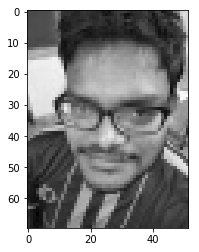

In [48]:
#Checking a sample image
img = plt.imread('./test_data_grays_resized/005.jpg')
plt.imshow(img,cmap="gray")
print(img.shape)
l = img.shape[0]
r = img.shape[1]
print(l,r)

#Creating DATA array
df = pd.DataFrame(columns=np.arange(l*r)+1)
path_new = "./local_test_data_grays_resize/"
i=0
categories=[]
for file in os.listdir(path_new):
    image = plt.imread(path_new+file)
    flt_image = image.flatten()
    categories.append(int(file[:3]))
    df.loc[i] = flt_image
    i=i+1
df['category'] = np.array(categories)

In [40]:
#df.to_csv('test_data1.csv',index=False)
df_test = pd.read_csv('test_data1.csv')
print(df_test.shape)
df_train = df
df_test.head()

(8, 3641)


,1,2,3,4,5,6,7,8,9,10,...,3632,3633,3634,3635,3636,3637,3638,3639,3640,category
0,223,233,243,248,253,253,253,254,253,255,...,43,45,41,42,42,46,45,46,41,1
1,252,252,251,252,251,250,247,245,240,234,...,86,89,90,89,88,84,81,76,74,1
2,225,224,224,223,222,222,222,221,222,219,...,222,224,224,227,226,224,219,220,219,1
3,199,197,195,195,188,172,162,165,166,169,...,93,109,124,104,102,107,103,93,84,2
4,111,114,116,119,112,73,46,35,48,41,...,66,54,54,60,59,58,55,53,56,5


# Testing on the new images

In [41]:
X_test = df_test.drop(['category'],axis=1)
y_test = df_test['category']
y_train = df['category']

In [42]:
adj_matrix_test = X_test-X_test.mean()
adj_arr_test = adj_matrix_test.values.astype(float)


In [43]:
proj_test_face = np.matmul(eig_face,adj_arr_test.T)

In [44]:
print(proj_test_face.shape)
print(eig_face.shape)
print(proj_test_face)

(45, 8)
(45, 3640)
[[-2.92281370e+06 -4.75890252e+06 -1.32509523e+07 -5.45358284e+06
   2.58543089e+07 -1.34208202e+07 -6.38586496e+05  1.45913493e+07]
 [-4.32899938e+06 -2.08391393e+06  4.96976558e+06 -1.61760467e+06
   8.60437514e+06 -2.89638725e+06 -1.10146021e+07  8.36736663e+06]
 [-3.16605104e+06 -1.32037429e+06 -3.75956743e+06  2.90609560e+06
   1.33061583e+06 -1.68591447e+06  5.53194368e+06  1.63252119e+05]
 [ 4.47329926e+06  8.15408638e+05 -3.90187714e+06 -4.58446075e+05
   1.83449638e+06  8.87101450e+05 -6.49043107e+06  2.84044857e+06]
 [ 5.02681743e+06 -2.37567577e+06 -6.26737897e+06 -3.06971537e+06
   3.32750255e+06 -2.57875850e+06  2.95489521e+06  2.98231342e+06]
 [-1.30695664e+06  1.39979801e+06 -4.22216839e+06  9.97950876e+05
   2.17080604e+06 -2.54615329e+06 -1.70454690e+06  5.21127029e+06]
 [ 2.08454864e+06  3.36321286e+06  6.33438088e+04 -6.44814602e+05
  -9.92575956e+05 -9.46143413e+05 -8.53148696e+05 -2.07442264e+06]
 [-8.96606216e+05  5.56473174e+05  5.37976332e+06 

In [45]:
pred_list = []
for column in proj_test_face.T:
    min_dist = np.linalg.norm(column-sig.T[0])
    cat = y_train[0]
    index = 0
    for i,col in enumerate(sig.T):
        dist = np.linalg.norm(column-col)
        if dist < min_dist:
            min_dist = dist
            index = i
            cat = df_train.loc[i,'category']
    pred_list.append((min_dist,cat))
            
            

In [46]:
pred_list

[(11531962.67852953, 4),
 (10054234.917260265, 9),
 (5724704.732201081, 1),
 (10750300.632104652, 9),
 (11753387.733663134, 5),
 (10161058.376583718, 9),
 (5724704.732201084, 5),
 (11386161.573975433, 2)]

# Accuracy

In [47]:
c=0
for i,actual in enumerate(y_test.values):
    if actual == pred_list[i][1]:
        c=c+1
print('Accuracy:',c/len(pred_list))

Accuracy: 0.25
